# Load the dataset: es (Spanish)

In [1]:
from google.colab import drive
# mount your google drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/TFG/AuTexTification/subtask_1/es')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load train and test datasets
train_df = pd.read_csv("train.tsv",  sep='\t', on_bad_lines='skip')
test_df = pd.read_csv("test.tsv",  sep='\t', on_bad_lines='skip')
print('Train dataset size:', train_df.shape)
print('Test dataset size:', test_df.shape)

Train dataset size: (32062, 6)
Test dataset size: (20129, 6)


In [3]:
# Show the first 5 rows
train_df.head()

,id,prompt,text,label,model,domain
0,5464,NO-PROMPT,Entrada en vigor. La presente Directiva entrar...,human,NO-MODEL,legal
1,30129,"Estos podrían ser preguntas, categorías de inf...",Preguntas: 1. ¿Cuáles son los principales argu...,generated,F,wiki
2,19553,-¿Desea algo? -Póngame una caja,¿Desea algo? Póngame una caja de madera. ¿Qué ...,generated,E,tweets
3,13005,NO-PROMPT,"@victor28088 1665 Tweets no originales, que as...",human,NO-MODEL,tweets
4,16919,NO-PROMPT,De pequeño Dios me dio a elegir entre tener un...,human,NO-MODEL,tweets


In [4]:
# Since we will only focus on a binary classification, we do not need the id, prompt and model variables
# We will mantain the domain variable to later study how well the model works depending on the domain
train_df = train_df.drop(['id', 'prompt', 'model'], axis=1)
test_df = test_df.drop(['id', 'prompt', 'model'], axis=1)

In [5]:
train_df.head()

,text,label,domain
0,Entrada en vigor. La presente Directiva entrar...,human,legal
1,Preguntas: 1. ¿Cuáles son los principales argu...,generated,wiki
2,¿Desea algo? Póngame una caja de madera. ¿Qué ...,generated,tweets
3,"@victor28088 1665 Tweets no originales, que as...",human,tweets
4,De pequeño Dios me dio a elegir entre tener un...,human,tweets


## Split the data
We will first split the `train_df` and `test_df` datasets into `X_train`, `y_train`, `domains_train` and `X_test`, `y_test`, `domains_test`, respectivately.

In [6]:
# Extract Texts
X_train = train_df['text']
X_test = test_df['text']

# Extract Labels
y_train = train_df['label']
y_test = test_df['label']

# Extract Domain column (we will use it later)
domains_train = train_df['domain']
domains_test = test_df['domain']

# DATA VISUALIZATION

## Dataset Size

In [7]:
print('Train dataset size:', len(X_train))
print('Test dataset size:', len(X_test))

Train dataset size: 32062
Test dataset size: 20129


## Class/Label distribution

In [8]:
counts_train = y_train.value_counts().to_dict()
print("Train distribution:", counts_train)
counts_test = y_test.value_counts().to_dict()
print("Test distribution:", counts_test)

labels = counts_train.keys()
print(labels)

Train distribution: {'generated': 16275, 'human': 15787}
Test distribution: {'generated': 11209, 'human': 8920}
dict_keys(['generated', 'human'])


Text(0, 0.5, 'Ner of Instances')

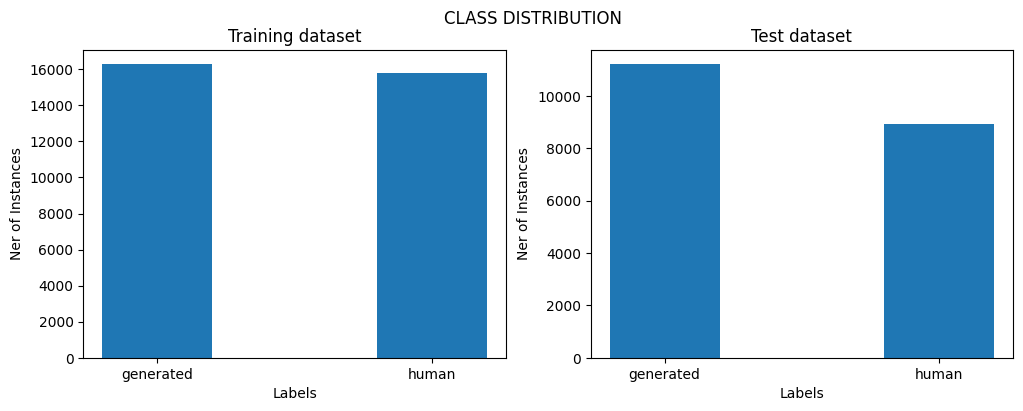

In [9]:
import matplotlib.pyplot as plt

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('CLASS DISTRIBUTION')

ax_train.bar(labels, counts_train.values(), width=0.4)
ax_train.set_title('Training dataset')
ax_train.set_xlabel('Labels')
ax_train.set_ylabel('Ner of Instances')

ax_test.bar(labels, counts_test.values(), width=0.4)
ax_test.set_title('Test dataset')
ax_test.set_xlabel('Labels')
ax_test.set_ylabel('Ner of Instances')

We notice that for both datasets, both classes *human* and *generated*, are equally distributed, i.e, the number of instances for each class is almost the same. Although, we can see that for the test dataset, it contains slightly fewer human instances than generated instances.


## Domain Distribution

In [10]:
counts_doms_train = domains_train.value_counts().to_dict()
print("Domain Train distribution:", counts_doms_train)
counts_doms_test = domains_test.value_counts().to_dict()
print("Domain Test distribution:", counts_doms_test)

train_domain_labels = counts_doms_train.keys()
print(train_domain_labels)
test_domain_labels = counts_doms_test.keys()
print(test_domain_labels)

Domain Train distribution: {'wiki': 11485, 'tweets': 11373, 'legal': 9204}
Domain Test distribution: {'news': 10737, 'reviews': 9392}
dict_keys(['wiki', 'tweets', 'legal'])
dict_keys(['news', 'reviews'])


Text(0, 0.5, 'Ner of Instances')

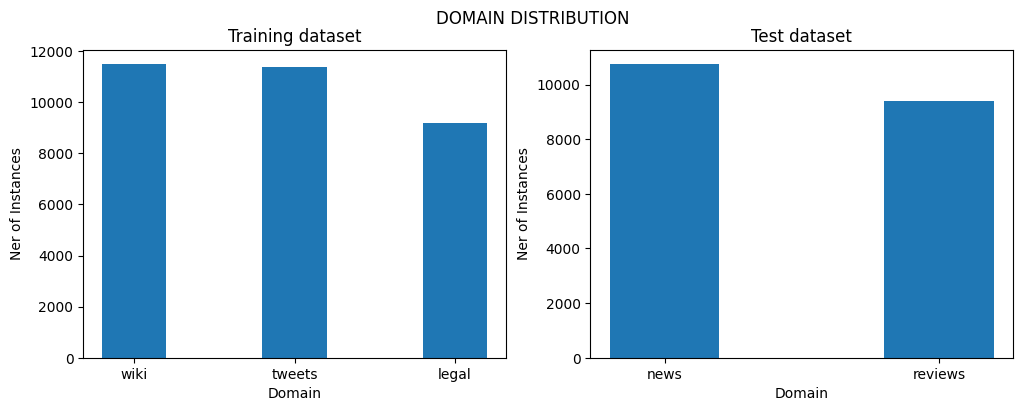

In [11]:
fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('DOMAIN DISTRIBUTION')

ax_train.bar(train_domain_labels, counts_doms_train.values(), width=0.4)
ax_train.set_title('Training dataset')
ax_train.set_xlabel('Domain')
ax_train.set_ylabel('Ner of Instances')

ax_test.bar(test_domain_labels, counts_doms_test.values(), width=0.4)
ax_test.set_title('Test dataset')
ax_test.set_xlabel('Domain')
ax_test.set_ylabel('Ner of Instances')

We observe that the training dataset is composed by texts from 3 domains: *wiki*, *tweets*, and *legal*.

While the test dataset from 2 other different domains: *news* and *reviews*.

As well as with the class distribution, we see that the domain distribution is well balanced for both datasets.

Let's plot the number of instances for each class label *human* and *generated*, for each domain.

Text(0, 0.5, 'Ner of Instances')

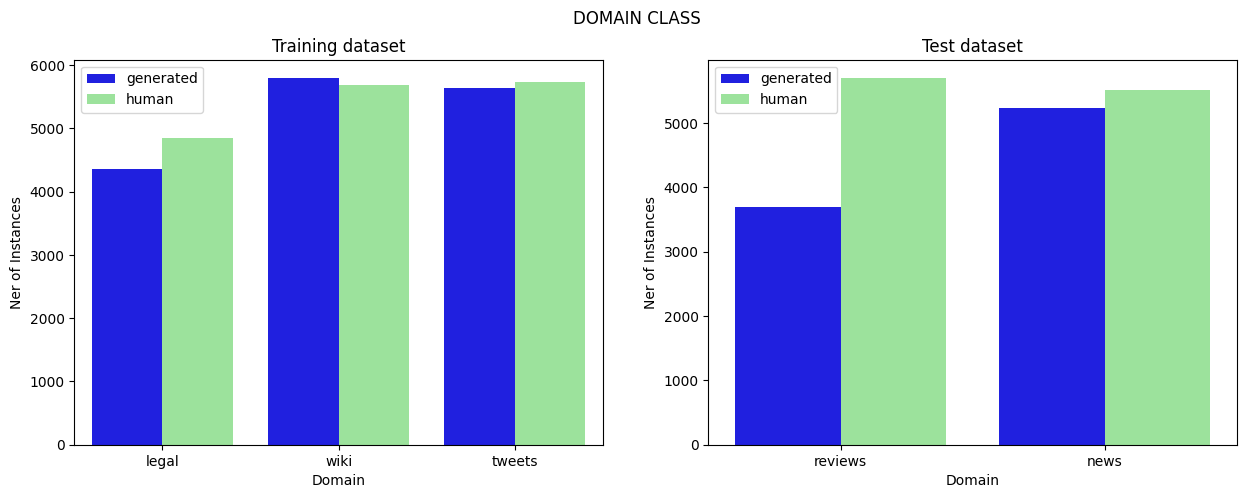

In [12]:
import seaborn as sns

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('DOMAIN CLASS')

sns.countplot(x=domains_train, hue=y_train, ax=ax_train, palette=['blue', 'lightgreen'])
ax_train.legend(labels)
ax_train.set_title('Training dataset')
ax_train.set_xlabel('Domain')
ax_train.set_ylabel('Ner of Instances')

sns.countplot(x=domains_test, hue=y_test, ax=ax_test, palette=['blue', 'lightgreen'])
ax_test.legend(labels)
ax_test.set_title('Test dataset')
ax_test.set_xlabel('Domain')
ax_test.set_ylabel('Ner of Instances')

We can see that the classes are well-balanced for all domains in both training and test datasets. Although, we can see that for the reviews domain, it contains slightly fewer generated instances than human instances, as seen in ***Table 3 defined in the AuTexTification Overview*** [(Sarvazyan et al., 2023)](https://arxiv.org/pdf/2309.11285):

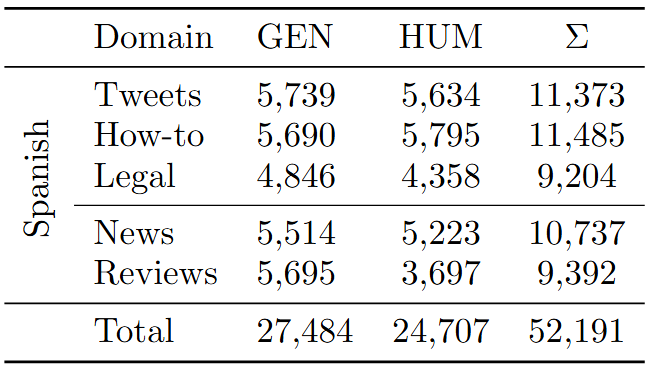

## Text Size Distribution

We will study the length of the texts, i.e, the number tokens each text is composed of.

In [13]:
# Calculate the length for the training dataset
length_train = X_train.apply(lambda text: len(text.split()))
length_train.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,text
count,32062.000000
mean,52.077693
std,27.724449
min,1.000000
25%,21.000000
50%,64.000000
75%,78.000000
90%,83.000000
95%,86.000000
99%,90.000000


The mean length of a text in the training dataset is 52.08 tokens, and the maximum length is 131 tokens.

Moreover, 50% of the texts have less than 64 tokens, while 75% have less than 78 tokens, and 99% less than 90 tokens.

As we can see from these values, the length difference is not big.

In [14]:
# Calculate the length for the test dataset
length_test = X_test.apply(lambda text: len(text.split()))
length_test.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,text
count,20129.000000
mean,62.813006
std,19.800074
min,1.000000
25%,53.000000
50%,62.000000
75%,80.000000
90%,85.000000
95%,87.000000
99%,90.000000


The mean length of a text in the test dataset is 62.81 tokens, and the maximum length is 136 tokens.

In addition, 50% of the texts have less than 62 tokens, while 75% have less than 80 tokens, and 99% less than 90 tokens.

Overall for both datasets, the length difference of tokens within the texts is not big.

Let's visualize it.

Text(0, 0.5, 'Frequency')

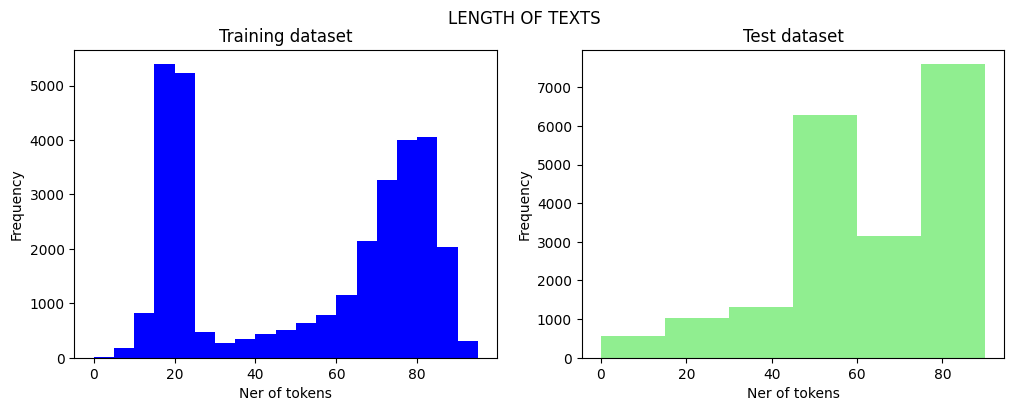

In [15]:
import numpy as np

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('LENGTH OF TEXTS')

ax_train.hist(length_train, bins=np.arange(0, 100, 5), color='blue')
ax_train.set_title('Training dataset')
ax_train.set_xlabel('Ner of tokens')
ax_train.set_ylabel('Frequency')

ax_test.hist(length_test, bins=np.arange(0, 100, 15), color='lightgreen')
ax_test.set_title('Test dataset')
ax_test.set_xlabel('Ner of tokens')
ax_test.set_ylabel('Frequency')

From the training dataset plot, we can tell that there is a high number of texts that are formed by approximately 20 tokens, which we could not interpret from only the description above. This could be due to the training dataset containing texts from the domain *tweets*, which tend to be short.

From the test dataset plot, we can see there are many texts containing between 45 and 90 tokens.

### Text Size Distribution for each Domain

Let's see the text length for each of the existing domains.

In [16]:
# Create a new training and test datasets joining texts, ner of tokens, and domain
train_dataset = [[X_train[i], length_train[i], domains_train[i]] for i in range(len(X_train))]
train_dataset = pd.DataFrame(train_dataset, columns=['Text', 'Length', 'Domain'])

test_dataset = [[X_test[i], length_test[i], domains_test[i]] for i in range(len(X_test))]
test_dataset = pd.DataFrame(test_dataset, columns=['Text', 'Length', 'Domain'])

Text(0, 0.5, 'Density')

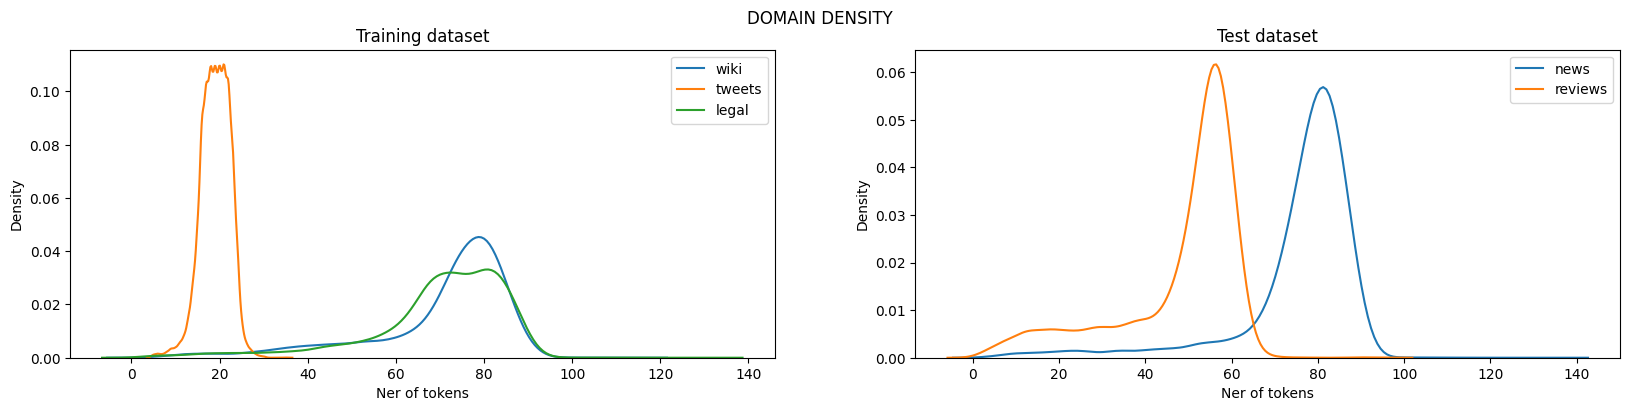

In [17]:
# Plot the figure
fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('DOMAIN DENSITY')

for domain in train_domain_labels:
    data = train_dataset[train_dataset['Domain'] == domain]['Length']
    sns.kdeplot(x=data, label=domain, ax=ax_train)
ax_train.legend()
ax_train.set_title('Training dataset')
ax_train.set_xlabel('Ner of tokens')
ax_train.set_ylabel('Density')

for domain in test_domain_labels:
    data = test_dataset[test_dataset['Domain'] == domain]['Length']
    sns.kdeplot(x=data, label=domain, ax=ax_test)
ax_test.legend()
ax_test.set_title('Test dataset')
ax_test.set_xlabel('Ner of tokens')
ax_test.set_ylabel('Density')

We notice that the texts of length near to 20 tokens belong to the domain *tweets* as we initially thought, as stated in the AuTexTification Overview [(Sarvazyan et al., 2023)](https://arxiv.org/pdf/2309.11285):

> "*The maximum number of completion tokens was manually selected for each domain to be similar to the median token-length of the human texts: 20 tokens for tweets, 70 for reviews, and 100 for news, legal, and how-to articles.*"



#### Class density distribution

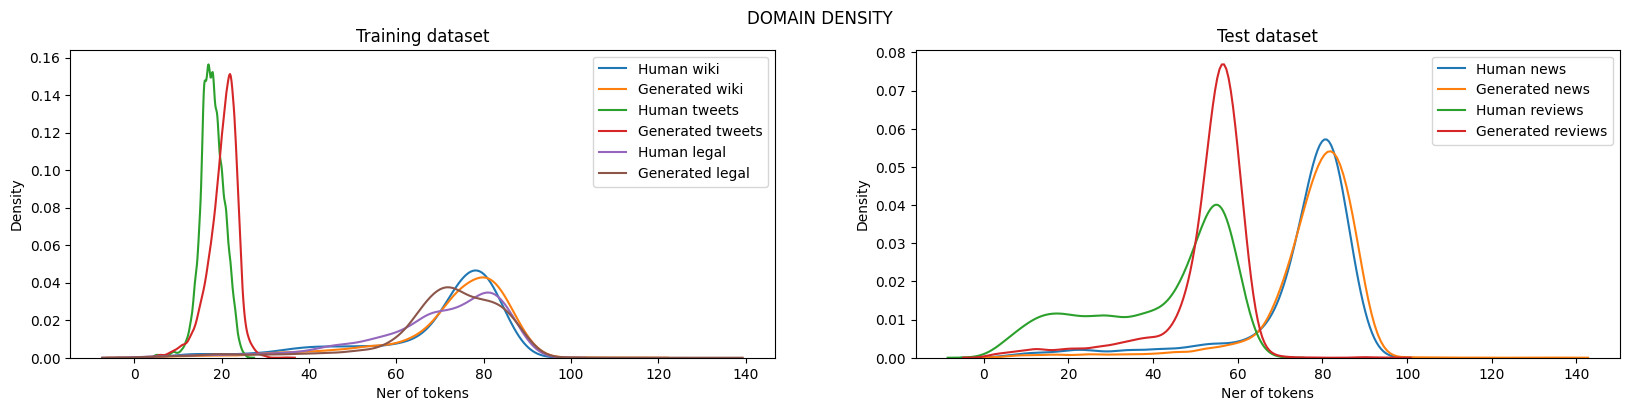

In [18]:
# Plot figure
fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('DOMAIN DENSITY')

# TRAINING DATASET
# Human label
train_human_dataset = [[X_train[i], length_train[i], domains_train[i]] for i in range(len(X_train)) if y_train[i]=='human']
train_human_dataset = pd.DataFrame(train_human_dataset, columns=['Text', 'Length', 'Domain'])
# Generated label
train_generated_dataset = [[X_train[i], length_train[i], domains_train[i]] for i in range(len(X_train)) if y_train[i]=='generated']
train_generated_dataset = pd.DataFrame(train_generated_dataset, columns=['Text', 'Length', 'Domain'])

# Plot human and generated domains
for domain in train_domain_labels:
    human_data = train_human_dataset[train_human_dataset['Domain'] == domain]['Length']
    sns.kdeplot(x=human_data, label=f'Human {domain}', ax=ax_train)
    generated_data = train_generated_dataset[train_generated_dataset['Domain'] == domain]['Length']
    sns.kdeplot(x=generated_data, label=f'Generated {domain}', ax=ax_train)

ax_train.set_title('Training dataset')
ax_train.set_xlabel('Ner of tokens')
ax_train.set_ylabel('Density')
ax_train.legend()

# TEST DATASET
# Human label
test_human_dataset = [[X_test[i], length_test[i], domains_test[i]] for i in range(len(X_test)) if y_test[i]=='human']
test_human_dataset = pd.DataFrame(test_human_dataset, columns=['Text', 'Length', 'Domain'])
# Generated label
test_generated_dataset = [[X_test[i], length_test[i], domains_test[i]] for i in range(len(X_test)) if y_test[i]=='generated']
test_generated_dataset = pd.DataFrame(test_generated_dataset, columns=['Text', 'Length', 'Domain'])

# Plot human and generated domains
for domain in test_domain_labels:
    human_data = test_human_dataset[test_human_dataset['Domain'] == domain]['Length']
    sns.kdeplot(x=human_data, label=f'Human {domain}', ax=ax_test)
    generated_data = test_generated_dataset[test_generated_dataset['Domain'] == domain]['Length']
    sns.kdeplot(x=generated_data, label=f'Generated {domain}', ax=ax_test)

ax_test.set_title('Test dataset')
ax_test.set_xlabel('Ner of tokens')
ax_test.set_ylabel('Density')
ax_test.legend()

plt.show()

We can see that for the training dataset, the texts are approximately of the same length for both classes.

For the reviews domain in the test dataset, the human texts are around 10 and 60 tokens long. While the generated texts are composed by a narrower range of values between 40 and 60 tokens.

### Text Size Distribution for each Label

Text(0, 0.5, 'Density')

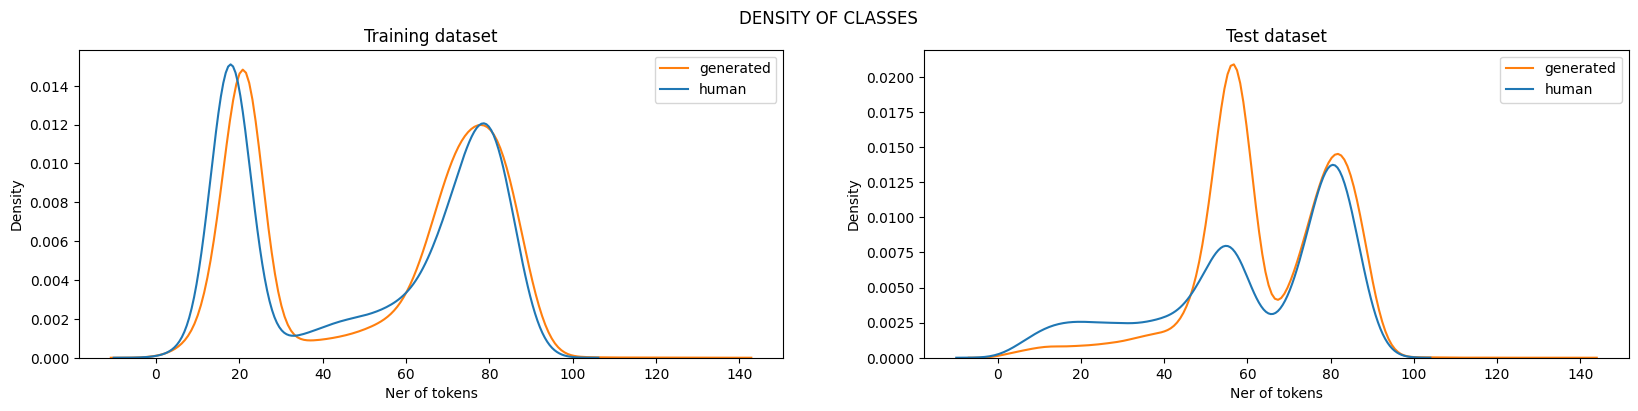

In [19]:
fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('DENSITY OF CLASSES')

sns.kdeplot(x=length_train, hue=y_train, ax=ax_train)
ax_train.legend(labels)
ax_train.set_title('Training dataset')
ax_train.set_xlabel('Ner of tokens')
ax_train.set_ylabel('Density')

sns.kdeplot(x=length_test, hue=y_test, ax=ax_test)
ax_test.legend(labels)
ax_test.set_title('Test dataset')
ax_test.set_xlabel('Ner of tokens')
ax_test.set_ylabel('Density')

For the training dataset, the class distribution is well balanced for all lengths of the texts.

While in the test dataset, for the texts with lengths between 40 and 60 tokens, the number of generated texts is greater than the human-written texts, being the peak around 55 tokens. However, as we saw in the section *Class/Label Distribution*, overall the distribution of classes is well proportioned.

#### Overall class/label distribution (whole dataset).
Let's see the label distribution from joining training and test datasets.

Text(0, 0.5, 'Density')

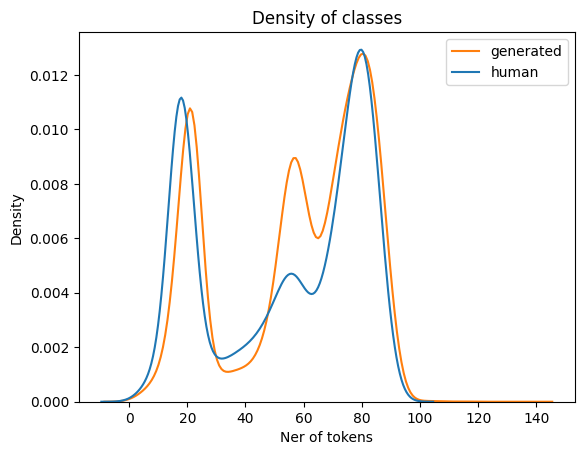

In [22]:
df = pd.concat([train_df, test_df])
df['length'] = df['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=df, x='length', hue='label')
plt.legend(labels)
plt.title('Density of classes')
plt.xlabel('Ner of tokens')
plt.ylabel('Density')

The overall distribution is pretty balanced for both *human* and *generated* labels.